# Mini proyecto #1
* Estefanía Barrio - 17927
* Paul Belches - 17088

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
ranValues = np.random.rand(1000000).tolist()

## Ejercicio #1

In [4]:
def shierpinski(x, y, randomValues):
    #Se obtuvo de manera experimental que la mejor combinación para obtener el fractal mas denso es apartir de 
    #de probabilidades p1,p2,p3 iguales. Es decir p1=p2=p3=0.33.
    p1, p2, p3 = 0.33, 0.33, 0.33
    for i in range(len(randomValues)):
        if (randomValues[i] < p1):
            x.append(x[i]/2)
            y.append(y[i]/2)
        elif (randomValues[i] < p2 + p1):
            x.append(x[i]/2 + 0.5)
            y.append(y[i]/2)
        else:
            x.append(x[i]/2 + 0.25)
            y.append(y[i]/2 + 0.5)
    return x, y

In [5]:
x, y = shierpinski([0],[0], ranValues)

In [6]:
plt.rcParams['figure.figsize'] = [10, 8]

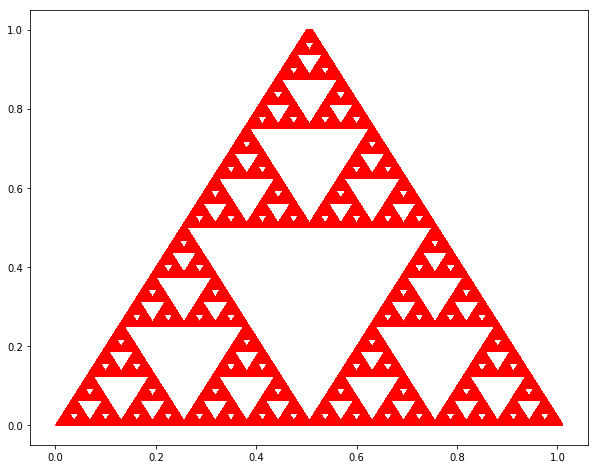

In [7]:
plt.scatter(x, y, marker=1, color="red")

## Ejercicio #2

In [8]:

def barnsley(x, y, randomValues):
    for i in range(len(randomValues)):
        if (randomValues[i] < 0.85):
            x.append(x[i]*0.85 + y[i]*0.04)
            y.append(x[i]*-0.04 + y[i]*0.85 + 1.6)
        elif (randomValues[i] < 0.92):
            x.append(x[i]*-0.15 + y[i]*0.28)
            y.append(x[i]*0.26 + y[i]*0.24 + 0.44)
        elif (randomValues[i] < 0.99):
            x.append(x[i]*0.2 + y[i]*-0.26)
            y.append(x[i]*0.23 + y[i]*0.22 + 1.6)
        else:
            x.append(0)
            y.append(y[i]*0.16)
    return x, y

In [9]:
x, y = barnsley([0],[0], ranValues)

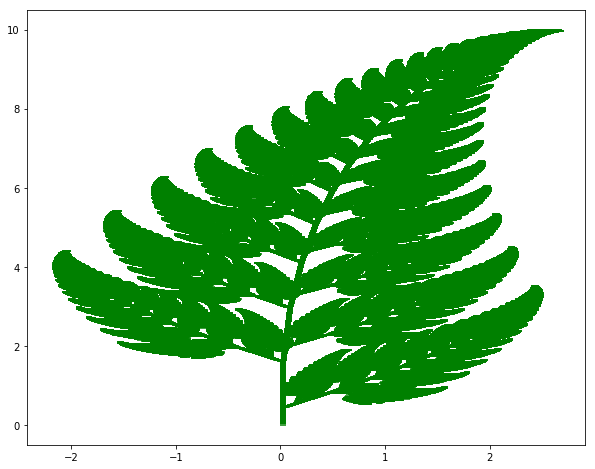

In [10]:
plt.scatter(x, y, marker=1, color="green")

## Ejercicio #3

### Generador #1

In [77]:
def g1(n, x0):
    x = [x0*1.0]
    for i in range(n):
        x.append((5**5)*x[i] % ((2**35)-1))
        x[i] = x[i] / ((2**35)-1)
    return x

### Generador #2

In [78]:
def g2(n, x0):
    x = [x0*1.0]
    for i in range(n):
        x.append((7**5)*x[i] % ((2**31)-1))
        x[i] = x[i] / ((2**31)-1)
    return x

In [79]:
#Función para generar gráficas de barras a partir de asteriscos
def barra(n):
    s = ""
    for i in range(n):
       s = s + '*'  
    return s

In [80]:
def histogramas(ln):
    intervalos = []
    intervalos = np.zeros(10).tolist()
    for i in ln:
        if (i <= 0.1):
            intervalos[0] += 1
        elif (i <= 0.2):
            intervalos[1] += 1
        elif (i <= 0.3):
            intervalos[2] += 1
        elif (i <= 0.4):
            intervalos[3] += 1
        elif (i <= 0.5):
            intervalos[4] += 1
        elif (i <= 0.6):
            intervalos[5] += 1
        elif (i <= 0.7):
            intervalos[6] += 1
        elif (i <= 0.8):
            intervalos[7] += 1
        elif (i <= 0.9):
            intervalos[8] += 1
        elif (i <= 1):
            intervalos[9] += 1
    total = np.sum(intervalos)
    intervalosp = []
    for i in range(len(intervalos)):
        intervalosp.append(intervalos[i]/total)
        print((i/10),(i+1)/10,":",barra((int)(intervalosp[i] * 500 //1)),intervalos[i], round(intervalosp[i] * 100,2) ,"%")
    
    

### Generación con 100 valores

In [81]:
g1n = g1(100, 1)

In [82]:
g2n = g2(100, 1)

In [83]:
histogramas(g1n)
#La distribucion no es necesariamente uniforme para g1, pero puede intuirse que tiende a una uniforme. 

(0, 0, ':', '*********************************************', 9.0, 9.0, '%')
(0, 0, ':', '*********************************************', 9.0, 9.0, '%')
(0, 0, ':', '*******************************************************', 11.0, 11.0, '%')
(0, 0, ':', '*******************************************************', 11.0, 11.0, '%')
(0, 0, ':', '*******************************************************', 11.0, 11.0, '%')
(0, 0, ':', '***********************************', 7.0, 7.0, '%')
(0, 0, ':', '***********************************', 7.0, 7.0, '%')
(0, 0, ':', '**************************************************', 10.0, 10.0, '%')
(0, 0, ':', '*****************************************************************', 13.0, 13.0, '%')
(0, 1, ':', '************************************************************', 12.0, 12.0, '%')


In [84]:
histogramas(g2n)
#La distribucon no parece ser uniforme para g1. Con 100 valores g1, es superior.

(0, 0, ':', '***************************************************************************', 15.0, 15.0, '%')
(0, 0, ':', '***************', 3.0, 3.0, '%')
(0, 0, ':', '**************************************************', 10.0, 10.0, '%')
(0, 0, ':', '*********************************************', 9.0, 9.0, '%')
(0, 0, ':', '*********************************************', 9.0, 9.0, '%')
(0, 0, ':', '*******************************************************', 11.0, 11.0, '%')
(0, 0, ':', '**************************************************', 10.0, 10.0, '%')
(0, 0, ':', '************************************************************', 12.0, 12.0, '%')
(0, 0, ':', '*********************************************', 9.0, 9.0, '%')
(0, 1, ':', '************************************************************', 12.0, 12.0, '%')


In [85]:
histogramas(np.random.rand(100).tolist())
#La distribucion no es necesariamente uniforme pero puede intuirse que tiende a una uniforme, sin embargo g1 es superior.
#Matematicamente hablando esto tiene sentido para las 3 muestras, pues 100 es un numero bastante alejado de el 
#concepto de infinitos datos que representarian la distribucion continua, al aumentar los numeros la distribucion 
#deberia verse mas uniforme. 

(0, 0, ':', '***************************************************************************', 15.0, 15.0, '%')
(0, 0, ':', '****************************************', 8.0, 8.0, '%')
(0, 0, ':', '**************************************************', 10.0, 10.0, '%')
(0, 0, ':', '*********************************************', 9.0, 9.0, '%')
(0, 0, ':', '****************************************', 8.0, 8.0, '%')
(0, 0, ':', '***********************************', 7.0, 7.0, '%')
(0, 0, ':', '*********************************************', 9.0, 9.0, '%')
(0, 0, ':', '**********************************************************************', 14.0, 14.0, '%')
(0, 0, ':', '*********************************************', 9.0, 9.0, '%')
(0, 1, ':', '*******************************************************', 11.0, 11.0, '%')


### Generación con 5000 valores

In [86]:
g1n = g1(5000, 1)

In [87]:
g2n = g2(5000, 1)

In [88]:
histogramas(g1n)
#La distribucion es mas uniforme que en el inciso anterior.

(0, 0, ':', '***************************************************', 510.0, 10.2, '%')
(0, 0, ':', '**************************************************', 507.0, 10.14, '%')
(0, 0, ':', '***********************************************', 474.0, 9.48, '%')
(0, 0, ':', '**********************************************', 467.0, 9.34, '%')
(0, 0, ':', '**************************************************', 505.0, 10.1, '%')
(0, 0, ':', '***************************************************', 513.0, 10.26, '%')
(0, 0, ':', '*************************************************', 496.0, 9.92, '%')
(0, 0, ':', '*************************************************', 490.0, 9.8, '%')
(0, 0, ':', '****************************************************', 520.0, 10.4, '%')
(0, 1, ':', '***************************************************', 518.0, 10.36, '%')


In [89]:
histogramas(g2n)
#La distribucion es mas uniforme que en el inciso anterior.

(0, 0, ':', '***********************************************', 477.0, 9.54, '%')
(0, 0, ':', '***************************************************', 517.0, 10.34, '%')
(0, 0, ':', '**************************************************', 503.0, 10.06, '%')
(0, 0, ':', '************************************************', 482.0, 9.64, '%')
(0, 0, ':', '****************************************************', 525.0, 10.5, '%')
(0, 0, ':', '*****************************************************', 534.0, 10.68, '%')
(0, 0, ':', '*************************************************', 492.0, 9.84, '%')
(0, 0, ':', '************************************************', 481.0, 9.62, '%')
(0, 0, ':', '*************************************************', 498.0, 9.96, '%')
(0, 1, ':', '*************************************************', 491.0, 9.82, '%')


In [90]:
histogramas(np.random.rand(5000).tolist())

(0, 0, ':', '*************************************************', 498.0, 9.96, '%')
(0, 0, ':', '*************************************************', 499.0, 9.98, '%')
(0, 0, ':', '*************************************************', 499.0, 9.98, '%')
(0, 0, ':', '*************************************************', 493.0, 9.86, '%')
(0, 0, ':', '*************************************************', 498.0, 9.96, '%')
(0, 0, ':', '*************************************************', 498.0, 9.96, '%')
(0, 0, ':', '*************************************************', 493.0, 9.86, '%')
(0, 0, ':', '***************************************************', 515.0, 10.3, '%')
(0, 0, ':', '***************************************************', 511.0, 10.22, '%')
(0, 1, ':', '*************************************************', 496.0, 9.92, '%')


In [91]:
#En el caso de esta 5000 valores podemos afirmar que todos los generadores se comportan de manera similar. 

### Generación con 100000 valores

In [92]:
g1n = g1(100000, 1)

In [93]:
g2n = g2(100000, 1)

In [94]:
histogramas(g1n)

(0, 0, ':', '*************************************************', 9863.0, 9.86, '%')
(0, 0, ':', '**************************************************', 10053.0, 10.05, '%')
(0, 0, ':', '***********************************************', 9595.0, 9.59, '%')
(0, 0, ':', '************************************************', 9783.0, 9.78, '%')
(0, 0, ':', '***************************************************', 10293.0, 10.29, '%')
(0, 0, ':', '**************************************************', 10130.0, 10.13, '%')
(0, 0, ':', '**************************************************', 10105.0, 10.11, '%')
(0, 0, ':', '*************************************************', 9803.0, 9.8, '%')
(0, 0, ':', '***************************************************', 10268.0, 10.27, '%')
(0, 1, ':', '**************************************************', 10107.0, 10.11, '%')


In [95]:
histogramas(g2n)

(0, 0, ':', '**************************************************', 10047.0, 10.05, '%')
(0, 0, ':', '**************************************************', 10016.0, 10.02, '%')
(0, 0, ':', '*************************************************', 9863.0, 9.86, '%')
(0, 0, ':', '*************************************************', 9878.0, 9.88, '%')
(0, 0, ':', '**************************************************', 10012.0, 10.01, '%')
(0, 0, ':', '***************************************************', 10285.0, 10.29, '%')
(0, 0, ':', '*************************************************', 9931.0, 9.93, '%')
(0, 0, ':', '*************************************************', 9955.0, 9.96, '%')
(0, 0, ':', '**************************************************', 10118.0, 10.12, '%')
(0, 1, ':', '*************************************************', 9895.0, 9.89, '%')


In [96]:
histogramas(np.random.rand(100000).tolist())

(0, 0, ':', '*************************************************', 9927.0, 9.93, '%')
(0, 0, ':', '**************************************************', 10058.0, 10.06, '%')
(0, 0, ':', '**************************************************', 10073.0, 10.07, '%')
(0, 0, ':', '*************************************************', 9867.0, 9.87, '%')
(0, 0, ':', '*************************************************', 9851.0, 9.85, '%')
(0, 0, ':', '**************************************************', 10059.0, 10.06, '%')
(0, 0, ':', '*************************************************', 9997.0, 10.0, '%')
(0, 0, ':', '**************************************************', 10006.0, 10.01, '%')
(0, 0, ':', '**************************************************', 10069.0, 10.07, '%')
(0, 1, ':', '**************************************************', 10093.0, 10.09, '%')


In [97]:
#Al correrlo para los tres generados, con un numero grande de valores, se pueden observar distribuciones 
#practiamente uniformes para los tres casos. Por lo que no se considera que alguno sea mejor que los demás.

## Ejercicio #4

In [98]:
import math

In [99]:
%%latex
Sea $g(x)=e^{-x^2}$ y $h(y)=\frac{g(\frac{1}{y}-1)}{y^2}$ y notando que g(x) es par se tiene lo siguiente:
\begin{align}
\int_{-\infty}^{\infty}g(x) dx = \int_{-\infty}^{\infty}e^{-x^2}dx \\
= 2\int_0^{\infty}e^{-x^2}dx \\ 
= 2\int_0^{\infty}g(x) dx \\
= 2 \int_0^1 h(y) dy \\
= 2 \int_0^1 \frac{g(\frac{1}{y}-1)}{y^2} dy \\
= 2\int_0^1\frac{e^{-(\frac{1}{y}-1)^2}}{y^2} dy
\end{align}

<IPython.core.display.Latex object>

In [100]:
def g(x):
    a=math.exp(-x**2)
    return a
#Se transforma la integral con la formula vista en clase cuando el limite es infinito 
def h(y):
    b=g((1/y)-1)/y**2
    return b
cant=[100,10000,1000000]
sum=0
vals=[]

for n in range(len(cant)):
    for i in range(cant[n]):
        sum=sum+h(np.random.random_sample())
    #note que la integral es par por lo que la integral de -infinito a infinito vale el doble que la de 0 a infinito, por esto el valor se multipica por dos
    e=2*sum/cant[n]
    vals.append(e)
print("Aplicando el metodo Montecarlo, con "+str(cant[0])+" iteraciones, la integral vale: "+str(vals[0])+".\n"+"Aplicando el metodo Montecarlo, con "+str(cant[1])+" iteraciones, la integral vale: "+str(vals[1])+". \n"+"Aplicando el metodo Montecarlo, con "+str(cant[2])+" iteraciones, la integral vale: "+str(vals[2])+".")


Aplicando el metodo Montecarlo, con 100 iteraciones, la integral vale: 1.54883285246.
Aplicando el metodo Montecarlo, con 10000 iteraciones, la integral vale: 1.77324551289. 
Aplicando el metodo Montecarlo, con 1000000 iteraciones, la integral vale: 1.7884338374.


## Ejercicio 5

In [101]:
%%latex
Sea $f(x,y)=e^{-(x+y)}$ y tomando en cuenta el orden de integracion en $\int_0^{\infty} \int_0^x f(x,y) dydx$ sean $h(x,y_2)=f(x,x*y_2)*x$ y $h_2(x_2,y_2)=\frac{h(\frac{1}{x_2}-1,y_2)}{(x_2)^2}$:
\begin{align}
\int_0^{\infty}\int_0^x f(x,y) dydx = \int_0^{\infty}\int_0^x e^{-(x+y)} dydx\\
= \int_0^{\infty}\int_0^1 h(x,y_2) dy_2dx \\ 
= \int_0^{\infty}\int_0^1 f(x,x*y_2)*x dy_2dx \\
= \int_0^{\infty}\int_0^1 e^{-(x+x*y_2)}*x dy_2dx \\
= \int_0^1\int_0^1 h_2(x_2,y_2) dy_2dx_2 \\
= \int_0^1\int_0^1 h_2(x_2,y_2) dy_2dx_2 \\
= \int_0^1\int_0^1 \frac{h(\frac{1}{x_2}-1,y_2)}{(x_2)^2} dy_2dx_2 \\
= \int_0^1\int_0^1 \frac{e^{-(\frac{1}{x_2}-1+(\frac{1}{x_2}-1)*y_2)}*(\frac{1}{x_2}-1)}{(x_2)^2} dy_2dx_2
\end{align}

<IPython.core.display.Latex object>

In [102]:
def f(x,y):
    a=math.exp(-(float(x)+float(y)))
    return a
#transformacion del limite de la primera integral (con respecto de y) con la transformacion vista en clase que se aplica cuando se tienen limites no infinitos
def h(x,y2):
    b=f(x,x*y2)*x
    return b
#transformacion del limite de la segunda integral (con respecto de x) con la transformacion vista en clase que se aplica cuando se tiene como limites 0 a infinito
def h2(x2,y2):
    c=h((1/x2)-1,y2)/x2**2
    return c
cant=[100,10000,1000000]
sum=0
vals=[]
for n in range(len(cant)):
    for i in range(cant[n]):
        sum=sum+h2(np.random.random_sample(),np.random.random_sample())
    e=sum/cant[n]
    vals.append(e)
print("Aplicando el metodo Montecarlo, con "+str(cant[0])+" iteraciones, la integral vale: "+str(vals[0])+".\n"+"Aplicando el metodo Montecarlo, con "+str(cant[1])+" iteraciones, la integral vale: "+str(vals[1])+". \n"+"Aplicando el metodo Montecarlo, con "+str(cant[2])+" iteraciones, la integral vale: "+str(vals[2])+".")


Aplicando el metodo Montecarlo, con 100 iteraciones, la integral vale: 0.504855679224.
Aplicando el metodo Montecarlo, con 10000 iteraciones, la integral vale: 0.499774740987. 
Aplicando el metodo Montecarlo, con 1000000 iteraciones, la integral vale: 0.50474576132.
